In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('batters_odi.csv',encoding = "ISO-8859-1")

In [3]:
df

,Name,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100s,50s
0,Ishan Kishan,27,24,2,933,210,42.40,913,102.19,1,7
1,Virat Kohli,286,274,43,13437,183,58.16,14341,93.69,48,69
2,Shreyas Iyer,52,47,5,1931,113,45.97,1982,97.42,3,15
3,Rishabh Pant,30,26,1,865,125,34.60,811,106.65,1,5
4,KL Rahul,66,62,13,2468,112,50.36,2827,87.30,6,16
...,...,...,...,...,...,...,...,...,...,...,...
204,KA Pollard (WI),107,99,7,2398,119,26.06,2547,94.14,3,10
205,CJ Chibhabha (ZIM),103,103,2,2389,99,23.65,3784,63.13,0,16
206,GP Thorpe (ENG),82,77,13,2380,89,37.18,3344,71.17,0,21
207,Rahmat Shah (AFG),73,69,2,2359,114,35.20,3366,70.08,4,16


In [4]:
batt_feature = df[['Runs', 'HS', 'Ave', 'SR', '100s', '50s']]

In [5]:
batt_feature

,Runs,HS,Ave,SR,100s,50s
0,933,210,42.40,102.19,1,7
1,13437,183,58.16,93.69,48,69
2,1931,113,45.97,97.42,3,15
3,865,125,34.60,106.65,1,5
4,2468,112,50.36,87.30,6,16
...,...,...,...,...,...,...
204,2398,119,26.06,94.14,3,10
205,2389,99,23.65,63.13,0,16
206,2380,89,37.18,71.17,0,21
207,2359,114,35.20,70.08,4,16


In [6]:
batt_feature.isnull().sum()

Runs    0
HS      0
Ave     0
SR      0
100s    0
50s     0
dtype: int64

In [7]:
batt_feature=batt_feature.dropna()

In [8]:
batt_feature['HS'].mean(),batt_feature['HS'].min(),batt_feature['HS'].max()

(137.3062200956938, 72, 269)

In [9]:
batt_feature['SR'].min()

51.71

In [10]:
condition1 = (batt_feature['Ave'] > 50)  # High batting average
condition2 = (batt_feature['100s'] > 2)   # Scored more than 2 centuries
condition3 = (batt_feature['50s'] > 5) 
condition4 = (batt_feature['Runs'] >=4000)
condition5 = (batt_feature['SR'] >=65)
condition6 = (batt_feature['HS'] >=90)
con1_forplysel=(condition4 & condition2 & condition3)
cond2_forplysel=(condition1 & condition5 & condition6)
# Create the 'Best_Player' target variable based on the conditions
batt_feature['Best_Player'] = (con1_forplysel | cond2_forplysel).astype(int)

In [11]:
batt_feature['Best_Player'].value_counts()

Best_Player
1    111
0     98
Name: count, dtype: int64

In [12]:
X = batt_feature.drop(labels=['Best_Player'],axis=1)
y = batt_feature['Best_Player']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train,X_test,y_test,y_train)

In [13]:
type(X_test)


pandas.core.frame.DataFrame

In [14]:
y_test.value_counts()

Best_Player
0    25
1    17
Name: count, dtype: int64

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[ 1.21236078,  1.62715023,  0.37827006,  0.16099774,  1.51892529,
         0.65324272],
       [-0.81474294,  0.07119661,  1.46831452,  2.13652751,  0.15782004,
        -1.06812272],
       [ 0.08475672,  1.36293169,  1.44128862,  0.83048283,  0.52903056,
         0.22290136],
       [-0.95990029, -1.10310801, -1.56759442,  0.66247837, -0.83207468,
        -0.96053738],
       [ 0.44646028,  0.10055423, -0.35400301, -0.94411699, -0.21339048,
         0.49186471],
       [-0.7015406 , -1.07375039, -0.24847333,  0.61435649, -0.70833784,
        -0.58398869],
       [ 0.74731334, -0.22237954, -0.05543121, -0.07285771, -0.46086416,
         0.97599874],
       [-0.86029583, -0.22237954, -0.33598575,  0.82035191, -0.21339048,
        -0.90674471],
       [-1.55990668, -1.95447885, -1.22397946,  2.24459068, -0.95581152,
        -1.4446714 ],
       [-0.92046644, -0.04623385, -0.51487144,  0.30367489, -0.46086416,
        -0.85295204],
       [-0.56386208, -0.80953185, -0.49556723, -0.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    
}

# Train and evaluate each model

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(model_name,accuracy)
    for i in range(len(y_pred)):
        #for pred_name,  in y_pred.items():
        if y_pred[i]==0:
            
            #X_test_original_list=[]
            X_test_original = scaler.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]
            #X_test_original_list=X_test_original_list.append(X_test_original)
            print(X_test_original, 'are not selected')
        elif y_pred[i]==1:
            
            #X_test_original_list=[]
            X_test_original = scaler.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]
            #X_test_original_list=X_test_original_list.append(X_test_original)
            print(X_test_original, 'are  selected')
print(len(y_pred))



Random Forest
Random Forest 0.9523809523809523
[8824.0, 194.0, 39.2, 80.7, 20.0, 43.0] are  selected
[2861.0, 141.0, 47.7, 104.1, 9.0, 11.0] are not selected
[5507.0, 185.0, 47.5, 88.6, 12.0, 35.0] are  selected
[2434.0, 101.0, 24.1, 86.6, 1.0, 13.0] are not selected
[6571.0, 142.0, 33.5, 67.6, 6.0, 40.0] are  selected
[3194.0, 102.0, 34.3, 86.0, 2.0, 20.0] are not selected
[7456.0, 131.0, 35.8, 77.9, 4.0, 49.0] are  selected
[2727.0, 131.0, 33.7, 88.5, 6.0, 14.0] are not selected
[669.0, 72.0, 26.8, 105.4, 0.0, 4.0] are not selected
[2550.0, 137.0, 32.3, 82.4, 4.0, 15.0] are not selected
[3599.0, 111.0, 32.4, 74.1, 4.0, 22.0] are not selected
[2682.0, 102.0, 40.6, 93.9, 3.0, 20.0] are not selected
[2380.0, 89.0, 37.2, 71.2, 0.0, 21.0] are not selected
[3843.0, 150.0, 40.9, 119.8, 9.0, 20.0] are not selected
[11739.0, 137.0, 39.5, 74.2, 10.0, 83.0] are  selected
[5856.0, 133.0, 51.4, 87.4, 16.0, 33.0] are  selected
[2994.0, 116.0, 24.5, 63.5, 2.0, 21.0] are not selected
[11363.0, 183.0

In [18]:
dump(model,'./../models/bat_model.joblib')

['./../models/bat_model.joblib']

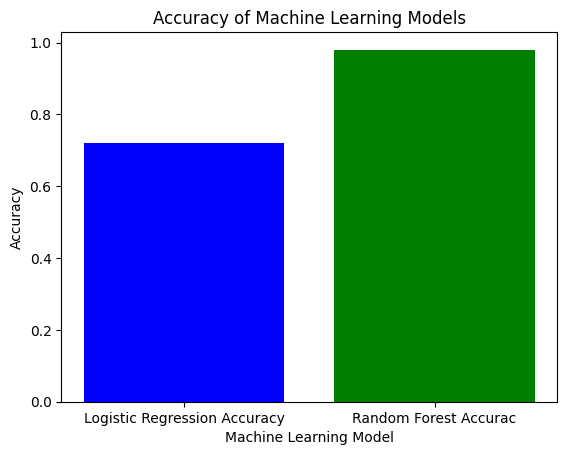

In [19]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy scores
models = ['Logistic Regression Accuracy','Random Forest Accurac']
accuracy_scores = [0.72,0.98]

# Create a bar chart
plt.bar(models, accuracy_scores, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Show the bar chart
plt.show()
